In [1]:
import pprint
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from utils.neuron import Neuron
from utils.layer import Layer
from utils.neuralNet import Network
import collections
from collections import defaultdict
import heapq

In [2]:
input_neuron = Neuron(1.22)
n1 = Neuron(input_neuron.input)
n2 = Neuron(input_neuron.input)

In [3]:
n1.get_state()

0

In [4]:
n1.feed_forward(input_neuron.signal)
n2.feed_forward(input_neuron.signal)

In [5]:
n1.signal

array([1.10463761, 2.20110128, 1.        ])

In [6]:
print(input_neuron.get_state())
print(n1.get_state())
print(n2.get_state())

0
2.201101278503536
1.441994711625835


In [7]:
print('')
pprint.pprint(n1.get_weights())
print('')
pprint.pprint(n2.get_weights())


array([[0.39562301, 0.58862664],
       [0.07195344, 0.5915385 ],
       [0.52310765, 0.67015463]])

array([[0.41069038, 0.59859888],
       [0.18019474, 0.50582278],
       [0.53511644, 0.01666232]])


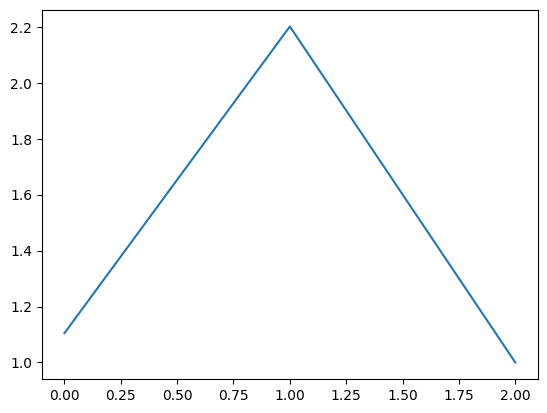

In [8]:
plt.plot(n1.signal)

In [9]:
transducer = Neuron(1.78293)
layer_1 = Layer(12)
layer_1.forward(transducer)
print(layer_1)

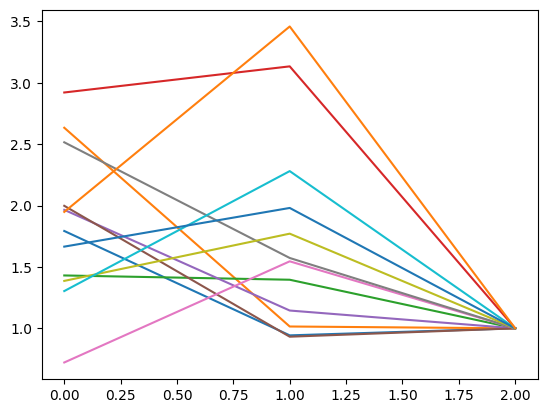

In [10]:
for n in layer_1.neurons:
    plt.plot(n.signal)

In [11]:
l2 = Layer(64)
l2.forward(n1.signal)

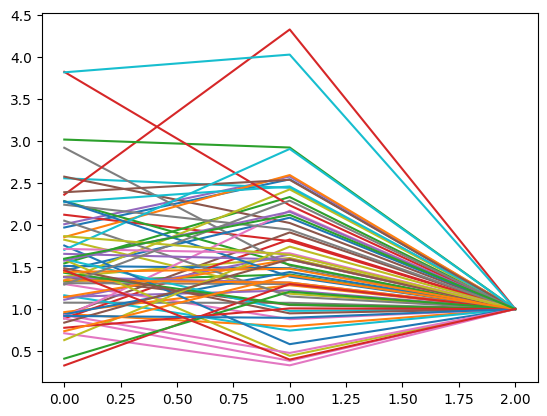

In [12]:

for n in l2.neurons:
    plt.plot(n.signal)

In [13]:
import networkx as nx

In [14]:
layer_1.neurons

array([<utils.neuron.Neuron object at 0x7fd0145bf1f0>,
       <utils.neuron.Neuron object at 0x7fd0145e9480>], dtype=object)

In [15]:
g = nx.MultiGraph()
edge_dict = defaultdict()

for idx, n in enumerate(layer_1.neurons):
    g.add_node(n)
    edge_dict[idx] = (n, n.edges_delta(5, l2))
print(edge_dict)

defaultdict(None, {0: (<utils.neuron.Neuron object at 0x7fd0145bf1f0>, [(0.17618409587157768, <utils.neuron.Neuron object at 0x7fd01498a7a0>), (0.461491379174916, <utils.neuron.Neuron object at 0x7fd01498a200>), (0.32817550849509547, <utils.neuron.Neuron object at 0x7fd01498a0e0>), (0.21526369155797753, <utils.neuron.Neuron object at 0x7fd014989de0>), (0.49554401420830074, <utils.neuron.Neuron object at 0x7fd01498a3b0>), (0.4073855044431851, <utils.neuron.Neuron object at 0x7fd01498a260>), (0.2810728498822923, <utils.neuron.Neuron object at 0x7fd01498a9b0>), (0.25054629685168206, <utils.neuron.Neuron object at 0x7fd01498aa10>), (0.031032226392623485, <utils.neuron.Neuron object at 0x7fd01498ab30>), (0.3364489657433809, <utils.neuron.Neuron object at 0x7fd01498ab90>), (0.06190997238010776, <utils.neuron.Neuron object at 0x7fd01498abc0>), (0.48989634620768663, <utils.neuron.Neuron object at 0x7fd01498abf0>), (0.4133986136934953, <utils.neuron.Neuron object at 0x7fd01498ac80>), (0.4854810

In [16]:
h = edge_dict[1][1]
print(len(h))

10


In [17]:
signal = Neuron(1.7892)
l1 = Layer(128)
l2 = Layer(64)
l1.forward(signal.input)
l2.forward(signal.input)
nn = Network([l1, l2])
nn.int_graph()

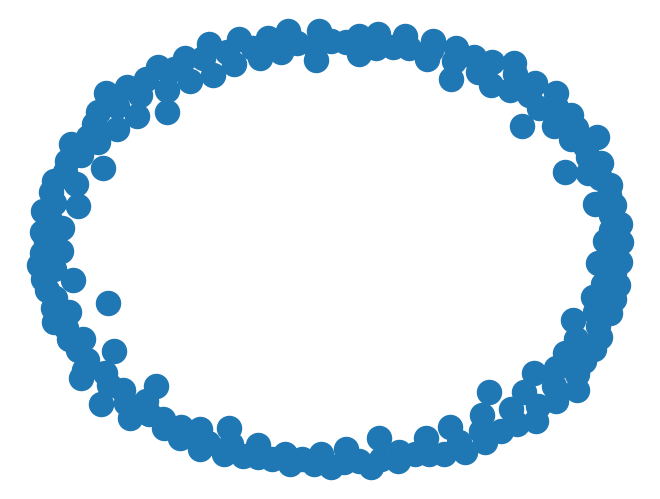

In [18]:
nx.draw(nn.graph)

In [19]:
nn.edge_dict

defaultdict(None, {})

In [20]:
nn.layers_cycle()

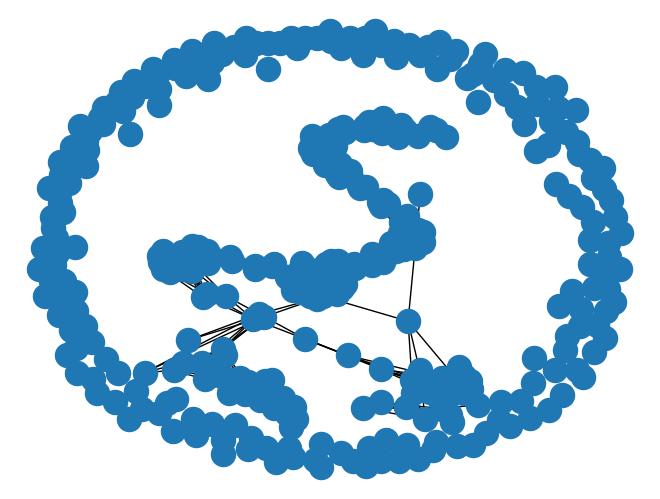

In [21]:
nx.draw(nn.graph)